In [9]:
from feature_eng import *
from sandy_eng import *
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

#### Load Datasets

In [3]:
train=load_training_values()
train_labels=load_training_labels()
target=train_labels['status_group']
test=load_test_values()

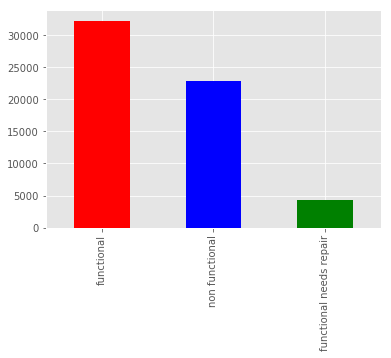

In [13]:
target.value_counts().plot(kind='bar',color=['r','b','g'])
plt.show()
plt.savefig('status_counts.png')

In [ ]:
#delete irrelevant, redundant, or predictively unimportant problems
deleteColumns(train)

In [ ]:
#Fills in null or 0 values with average values in different columns according to different procedures

#Average over entire column
avgConstrYear(train)

#Fills in empty cells in TRUE/FALSE columns with "NEUTRAL" for public_meeting and permit columns
zeros_public_meeting(train)
zeros_permit(train)

#Fills in location data nulls and 0 values with averages based on district_code
zeros_means(train)


In [16]:
#Example: Testing on GPS data
from sklearn import preprocessing, svm

gps_data=train.filter(['longitude','latitude','gps_height'],axis=1)
le = preprocessing.LabelEncoder()
le.fit(target)
y=le.transform(target)

classifier=svm.SVC()
classifier.fit(gps_data, y)
score=classifier.score(gps_data, y)